<a href="https://colab.research.google.com/github/allensheneka/predict-sales/blob/analysis/Predict_Sales_Visualizations1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict Sales - Visualizations #1

Sheneka Allen

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = ('/content/drive/MyDrive/Data Science/sales_predictions.csv')
predict_sales_df = pd.read_csv(filename)
predict_sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
predict_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


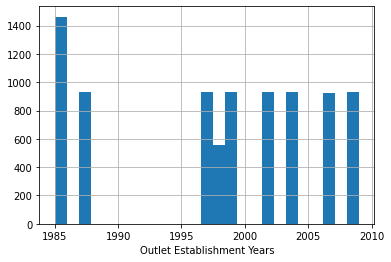

In [ ]:
# histogram of outlet openings each year
predict_sales_df["Outlet_Establishment_Year"].hist(bins=25)
plt.xlabel("Outlet Establishment Years");

Histogram Analysis:  This data shows that the majority of the Outlets were established between ~1997 to 2009; 1997-1999; 2002 & 2004; 2007 & 2009.  Early years, Outlets were established in years 1986 & 1988 with about a 7yr break from opening Outlets between 1989-1996.

##UPDATE
Added barplot, histogram and boxplot

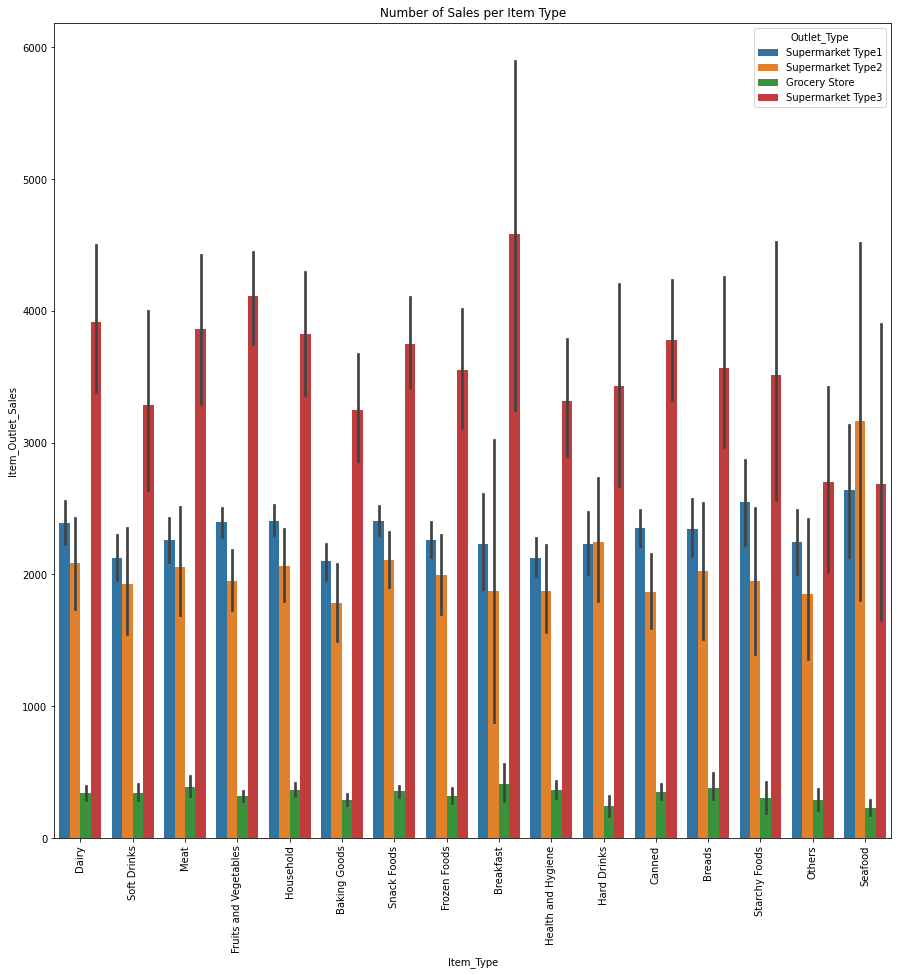

In [ ]:
# created barplot to visually explain which items sold best in which type stores/outlets

# enlarged figure size for readability
plt.subplots(figsize=(15,15))

# plot multiple data variables on a single chart
sns.barplot(data=predict_sales_df, x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Type')
plt.xticks(rotation=90)
plt.title("Number of Sales per Item Type");


Supermarket Type 3 (Red) is the clear winner in sales($) for every Item_Type with Lo of 2800 Others and HI of 4600 Breakfast.

Grocery Stores (Green) is the clear under performer with all item type sales ($) under 400 each.

Supermarket Types 2 & 1 are closer with respect to Item Type sales ($), ranging between Lo of 1800 baking goods and HI of 2500 seafood.

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

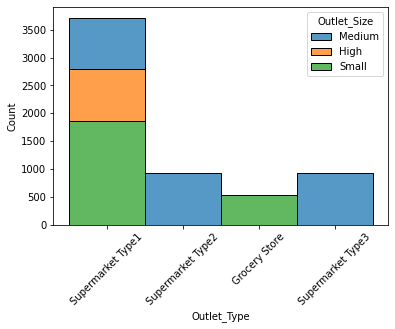

In [ ]:
# histogram
sns.histplot(data=predict_sales_df, x='Outlet_Type', hue='Outlet_Size', multiple='stack')
plt.xticks(rotation=45)

Clearly, there are more Supermarket Type 1 outlet types built than any other while Grocery Stores were the least built.

Interestingly, this histogram shows that Supermarket Type 1 has THREE different outlet sizes:  Small, Medium and Large (versus one size like the other 3 outlet types); with Small having the largest count and Medium and High sizes about equal in count.

Supermarket Type 2 and 3 are about equal in count.

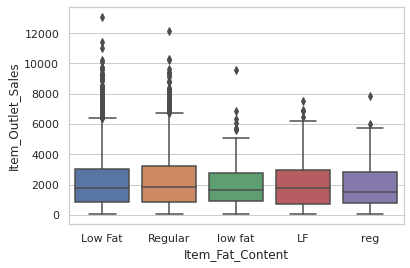

In [ ]:
# boxplot
# Referenced seaborn parameters: https://seaborn.pydata.org/generated/seaborn.set_theme.html

# change the axis style for quick interpretation
sns.set_theme(style="whitegrid")
sns.boxplot(data=predict_sales_df, x="Item_Fat_Content", y="Item_Outlet_Sales")


It appears that Fat Content was not a big factor in Item Outlet Sales since sales average about $2000 for all fat content categories.  Regular fat products had the widest range of data for Item Outlet Sales, however, in the fat content category.

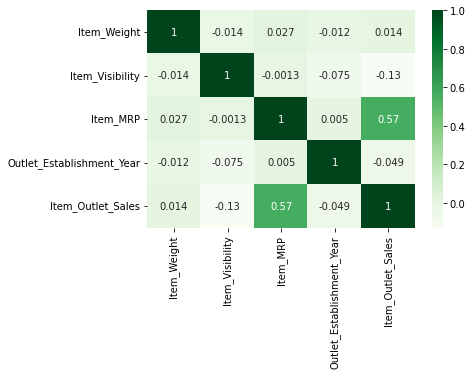

In [ ]:
# correlation and heatmap to determine IF there are any dataset relationships
corr = predict_sales_df.corr()

# add correlation coefficients to heatmap with annot = True
sns.heatmap(corr, cmap = 'Greens', annot = True);

Heatmap Analysis:  The Item_MRP and Item_Outlet_Sales data show a 'moderate' correlation relationship with 0.57 coefficient.  With majority of values less than 0.3, few dataset variables show any relationships.

In [ ]:
predict_sales_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


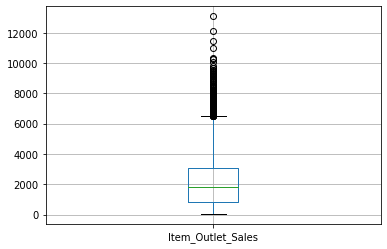

In [ ]:
# Boxplots of Item Outlet Sales
predict_sales_df.boxplot(column=["Item_Outlet_Sales"]);

# boxplot shows that majority of sales are in 75% quartile (2000-5000); 25% of data is less than 2000
# demonstrating that data overall is somewhat skewed, significant data outliers.  Max sales is 7000.